In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("/content/MARUTI.NS.csv")

In [30]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/1/2018,9749.00,9789.0,9629.80,9651.90,9150.26,426354
1,1/2/2018,9699.00,9718.6,9525.00,9554.05,9057.50,451227
2,1/3/2018,9597.00,9598.0,9402.00,9416.60,8927.19,658281
3,1/4/2018,9450.00,9488.0,9367.20,9386.25,8898.42,562919
4,1/5/2018,9458.00,9532.0,9412.55,9433.85,8943.55,732512
...,...,...,...,...,...,...,...
1231,12/26/2022,8147.00,8346.0,8076.05,8256.80,8256.80,315102
1232,12/27/2022,8298.95,8315.0,8230.80,8305.45,8305.45,423308
1233,12/28/2022,8315.00,8453.5,8287.60,8421.05,8421.05,538632
1234,12/29/2022,8370.00,8449.0,8333.00,8435.80,8435.80,452134


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1236 non-null   object 
 1   Open       1236 non-null   float64
 2   High       1236 non-null   float64
 3   Low        1236 non-null   float64
 4   Close      1236 non-null   float64
 5   Adj Close  1236 non-null   float64
 6   Volume     1236 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [32]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03
mean,7473.965008,7561.551375,7375.101173,7463.637540,7300.564798,8.911949e+05
std,1093.206526,1083.539930,1097.313431,1086.569717,1048.978300,5.519953e+05
min,4150.000000,4267.000000,4001.100000,4011.500000,3924.710000,3.005200e+04
25%,6858.000000,6939.225000,6775.162500,6846.550000,6723.882500,5.199990e+05
50%,7308.500000,7382.000000,7223.625000,7303.100000,7158.755000,7.367390e+05
75%,8466.212500,8565.337500,8372.500000,8472.050000,8244.795000,1.081938e+06
max,9853.000000,9929.000000,9725.000000,9832.450000,9527.600000,4.892962e+06


In [33]:
df.Data	= pd.to_datetime(df.Date)
df2 =df.set_index('Date')

<ipython-input-33-9d7ec7e71958>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Data	= pd.to_datetime(df.Date)


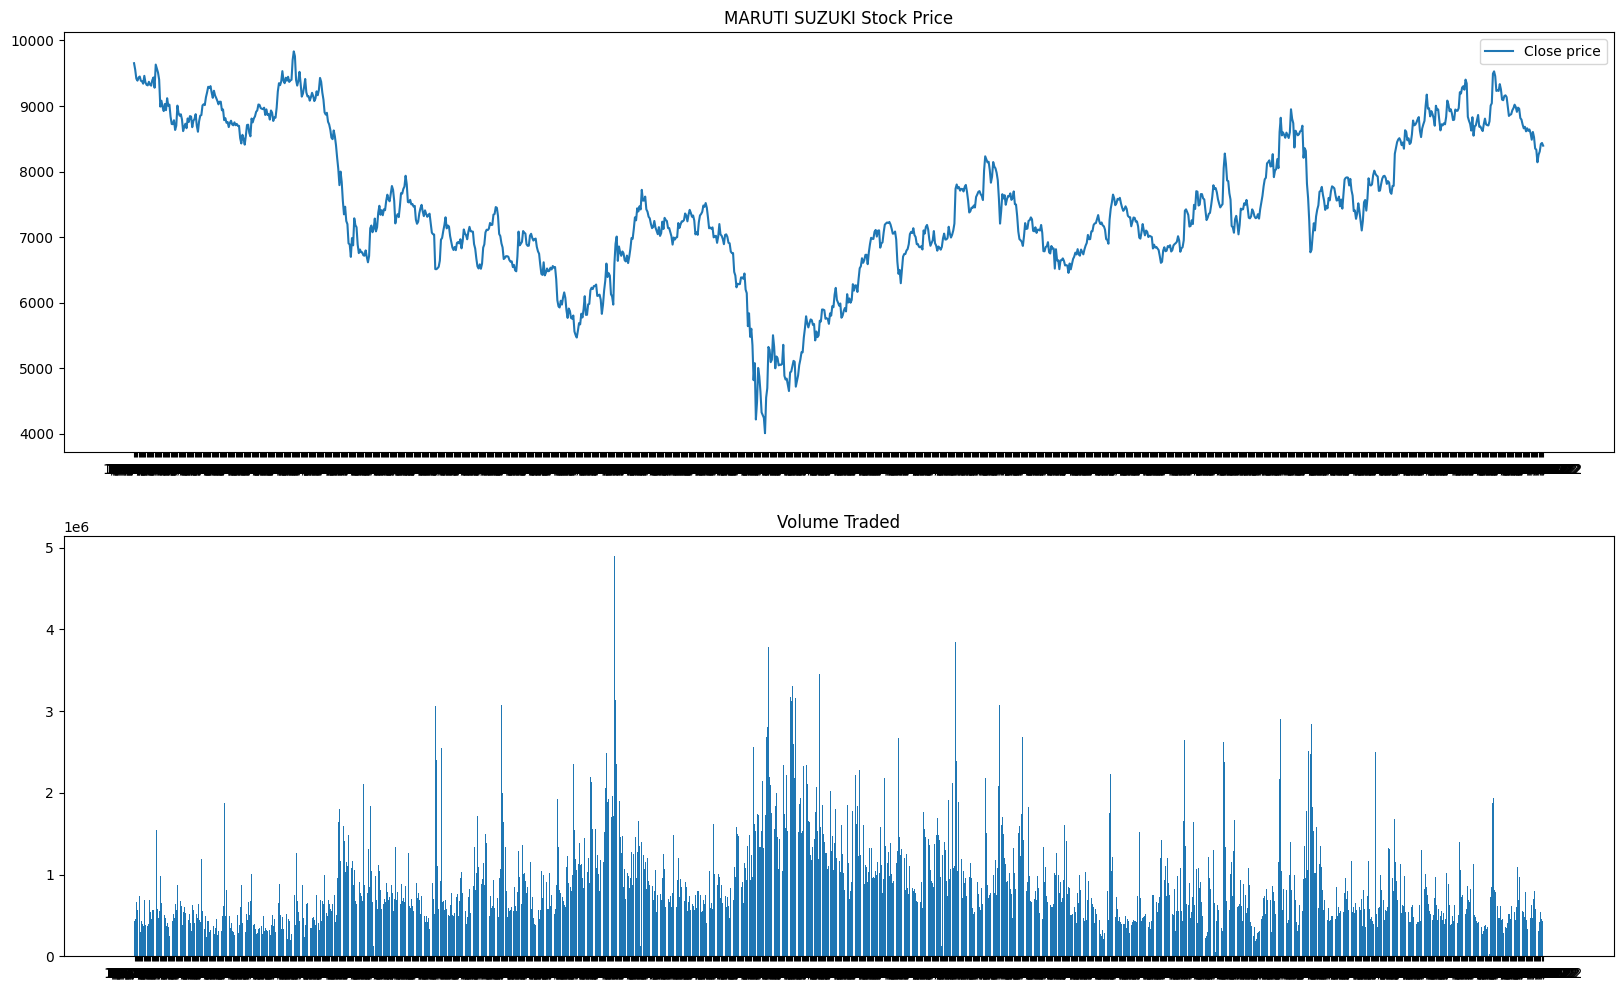

In [34]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('MARUTI SUZUKI Stock Price')
plt.plot(df2.Close,label='Close price')
plt.legend()
plt.subplot(2, 1, 2)
plt.title('Volume Traded')
plt.bar(x=df2.index,height=df2['Volume'])
plt.show()


# ARIMA Model:-


In [35]:
data = list(df2["Close"])

In [36]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  -2.6025487419344073
2. P-Value :  0.09247163768677513
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 1235
5. Critical Values :
	 1% :  -3.4356560275160835
	 5% :  -2.8638831211270817
	 10% :  -2.568017509711682


In [37]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [39]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [40]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

1136 100


In [41]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15676.891, Time=1.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15669.361, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15670.988, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15670.996, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15667.429, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15672.991, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.929 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1236
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -7832.715
Date:                Sun, 07 May 2023   AIC                          15667.429
Time:                        07:14:11   BIC                          15672.548
Sample:                             0   HQIC                         15669.355
    

In [42]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(2,2,0))

In [43]:
from statsmodels.tsa.arima.model import ARIMA
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1236
Model:                 ARIMA(2, 2, 0)   Log Likelihood               -8006.518
Date:                Sun, 07 May 2023   AIC                          16019.036
Time:                        07:14:11   BIC                          16034.390
Sample:                             0   HQIC                         16024.812
                               - 1236                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6478      0.020    -33.140      0.000      -0.686      -0.610
ar.L2         -0.3162      0.021    -14.961      0.000      -0.358      -0.275
sigma2      2.531e+04    702.698     36.017      0.000    2.39e+04    2.67e+04
===================================================================================
Ljung-Box (L1) (Q):                   7.49   Jarque-Bera (JB):               268.91
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             0.17
Prob(H) (two-sided):                  0.08   Kurtosis:                         5.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([8952.07837547, 8731.85622276, 8911.06868883, 8851.90710428,
       8802.18581311, 8623.62664247, 9052.10047456, 8988.15630809,
       9025.49540644, 8701.86092467, 8519.9435614 , 8649.66020499,
       8681.1236037 , 8770.91573669, 8720.57095019, 8879.22301603,
       9202.43800187, 9122.33376395, 8941.95031024, 8907.72879247,
       8844.08418638, 8737.62946203, 8738.85535014, 8969.77700024,
       8974.51628604, 8969.13823279, 8975.34960478, 9308.30379951,
       9275.86602504, 9383.00820328, 9331.77711353, 9264.72435556,
       9444.83653377, 9357.18388699, 8685.18516205, 8565.52671034,
       8529.09125941, 8554.01989387, 8851.00326456, 8483.16828928,
       8712.10688162, 8666.07309622, 8855.42618879, 8920.92294464,
       8673.05929248, 8654.70192718, 8580.94438762, 8594.43191339,
       8738.89761794, 8861.8892507 , 8749.74047145, 8700.43436228,
       8670.06469247, 8782.19973225, 9108.67667026, 9154.04672529,
       9739.25097472, 9701.03769561, 9583.00948818, 9136.96715

In [45]:
s = pd.Series(pred, index =df2.index[-100:])
s

Date
8/5/2022      8952.078375
8/8/2022      8731.856223
8/10/2022     8911.068689
8/11/2022     8851.907104
8/12/2022     8802.185813
                 ...     
12/26/2022    8013.384952
12/27/2022    8228.384518
12/28/2022    8299.826428
12/29/2022    8514.324421
12/30/2022    8494.710037
Length: 100, dtype: float64

<Axes: xlabel='Date'>

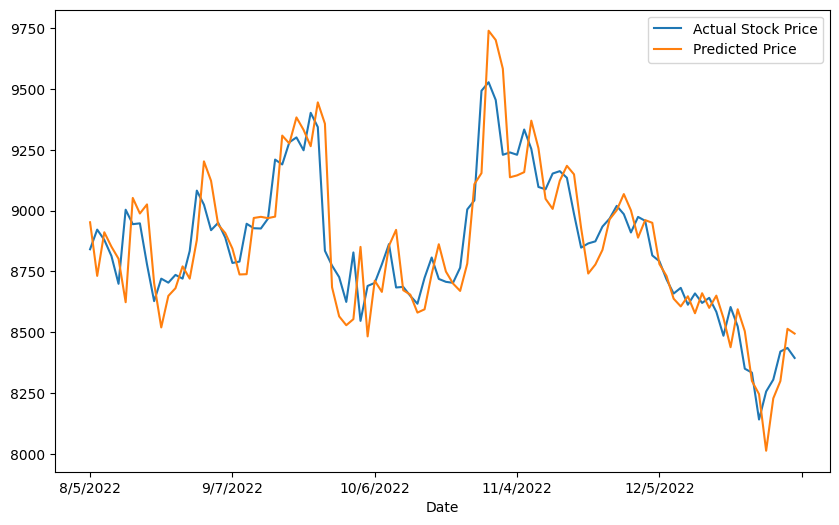

In [46]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

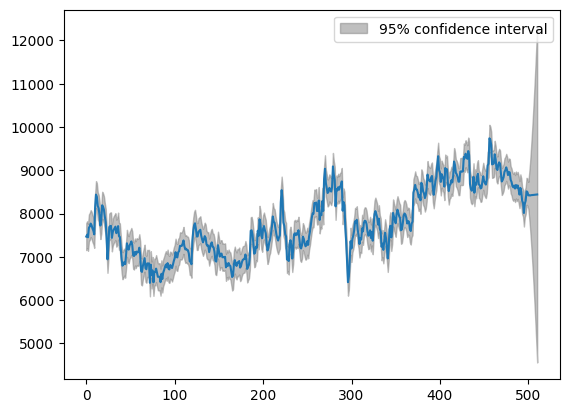

In [47]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, start = len(data)-500, end = len(data)+10, dynamic = False);

In [48]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

144.49400516869187

In [49]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.7265974776742237

# Predicting Future 10 values:

In [50]:
pred_future = model.predict(start=end,end=end+30)
pred_future

array([8494.71003748, 8421.53796543, 8422.028639  , 8418.10442272,
       8425.40389909, 8426.82864958, 8428.50977399, 8431.88263106,
       8434.0784817 , 8436.5018243 , 8439.15000902, 8441.58059571,
       8444.08104205, 8446.60504512, 8449.09169545, 8451.59509392,
       8454.09945507, 8456.59789616, 8459.09986793, 8461.60142462,
       8464.10213367, 8466.60352309, 8469.10473982, 8471.60585326,
       8474.10708822, 8476.60827713, 8479.10945744, 8481.61065788,
       8484.111848  , 8486.61303844, 8489.11423194])

In [51]:
import datetime
start_date = datetime.datetime(2022,12,30)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(31)]

In [52]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2022-12-30    8494.710037
2022-12-31    8421.537965
2023-01-01    8422.028639
2023-01-02    8418.104423
2023-01-03    8425.403899
2023-01-04    8426.828650
2023-01-05    8428.509774
2023-01-06    8431.882631
2023-01-07    8434.078482
2023-01-08    8436.501824
2023-01-09    8439.150009
2023-01-10    8441.580596
2023-01-11    8444.081042
2023-01-12    8446.605045
2023-01-13    8449.091695
2023-01-14    8451.595094
2023-01-15    8454.099455
2023-01-16    8456.597896
2023-01-17    8459.099868
2023-01-18    8461.601425
2023-01-19    8464.102134
2023-01-20    8466.603523
2023-01-21    8469.104740
2023-01-22    8471.605853
2023-01-23    8474.107088
2023-01-24    8476.608277
2023-01-25    8479.109457
2023-01-26    8481.610658
2023-01-27    8484.111848
2023-01-28    8486.613038
2023-01-29    8489.114232
dtype: float64